In [7]:
import numpy as np
import pandas as pd
import random

from trmf import trmf
from synthetic_data import SyntheticData

from Forecast import AutoRegressionModel, NaiveModel, MeanModel
from RollingCV import RollingCV

import matplotlib.pyplot as plt
%matplotlib inline

# Experiments on synthetic data

#### 1. Experiment description:

** Models: ** Naive, Mean, AutoRegression and TRMF models;

** Lags: ** {1},  {1,7},  {1,7,14,28};

** Forecast horizon: ** 1, 5, 10, 20;

** Metrics: ** Normalized deviation (ND), Normalized Root Mean Squared Error (NRMSE).

#### 2.1 Lags = {1}

##### 2.1.1 Generate several timeseries.

In [8]:
N = 16
T = 300
K = 4
lags = [1]
L = len(lags)
sigma_w = 0.5
sigma_x = 0.1
sigma_t = 0.0

sd = SyntheticData(N, T, K, lags, sigma_w, sigma_x, sigma_t)

In [9]:
sd.synthesize_data()
data = sd.get_data()

Visualise one of timeseries.

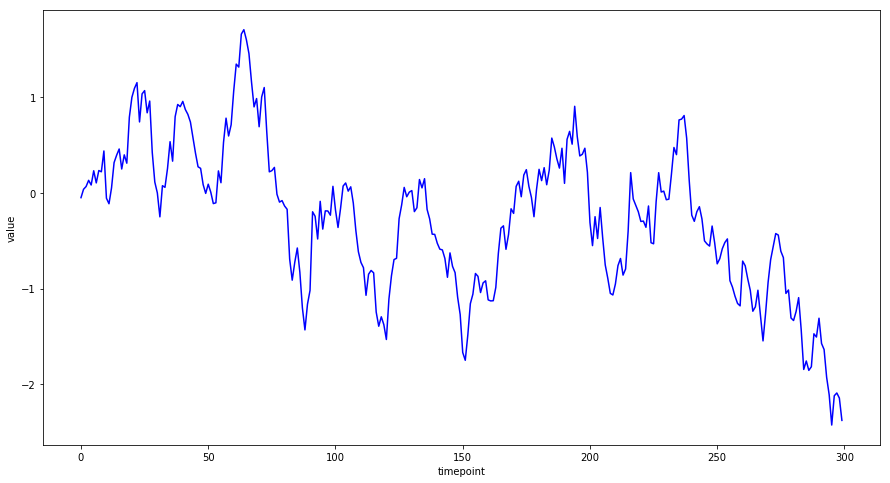

In [10]:
plt.figure(figsize=(15,8))
plt.plot(data[0], color='blue')

plt.xlabel('timepoint')
plt.ylabel('value')

plt.show()

##### 2.1.2 Apply models

In [11]:
# Naive model
for h in [1, 5, 10, 20]:
    model = NaiveModel()
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('Naive model performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                           round(np.array(scores_nrmse).mean(),3)))

Naive model performance ND/NRMSE: 0.105/0.138
Naive model performance ND/NRMSE: 0.151/0.2
Naive model performance ND/NRMSE: 0.175/0.23
Naive model performance ND/NRMSE: 0.38/0.477


In [12]:
# Mean model
for h in [1, 5, 10, 20]:
    model = MeanModel()
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('Mean model performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                          round(np.array(scores_nrmse).mean(),3)))

Mean model performance ND/NRMSE: 1.0/1.136
Mean model performance ND/NRMSE: 1.0/1.114
Mean model performance ND/NRMSE: 1.0/1.094
Mean model performance ND/NRMSE: 1.0/1.079


In [13]:
# AR model
for h in [1, 5, 10, 20]:
    model = AutoRegressionModel(lags)
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('AR performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                  round(np.array(scores_nrmse).mean(),3)))

AR performance ND/NRMSE: 0.107/0.142
AR performance ND/NRMSE: 0.16/0.215
AR performance ND/NRMSE: 0.2/0.275
AR performance ND/NRMSE: 0.42/0.536


In [15]:
# TRMF model
lambda_f = 1.
lambda_x = 1.
lambda_w = 1.
eta = 1.
alpha = 1000.
max_iter = 5000

for h in [1, 5, 10, 20]:
    model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta, max_iter)
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('TRMF performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                    round(np.array(scores_nrmse).mean(),3)))

TRMF performance ND/NRMSE: 0.172/0.218
TRMF performance ND/NRMSE: 0.155/0.227
TRMF performance ND/NRMSE: 0.197/0.261
TRMF performance ND/NRMSE: 0.368/0.48


#### 2.2 Lags = {1,7}

##### 2.2.1 Generate several timeseries.

In [16]:
N = 16
T = 300
K = 4
lags = [1,7]
L = len(lags)
sigma_w = 0.5
sigma_x = 0.1
sigma_t = 0.0

sd = SyntheticData(N, T, K, lags, sigma_w, sigma_x, sigma_t)

In [17]:
sd.synthesize_data()
data = sd.get_data()

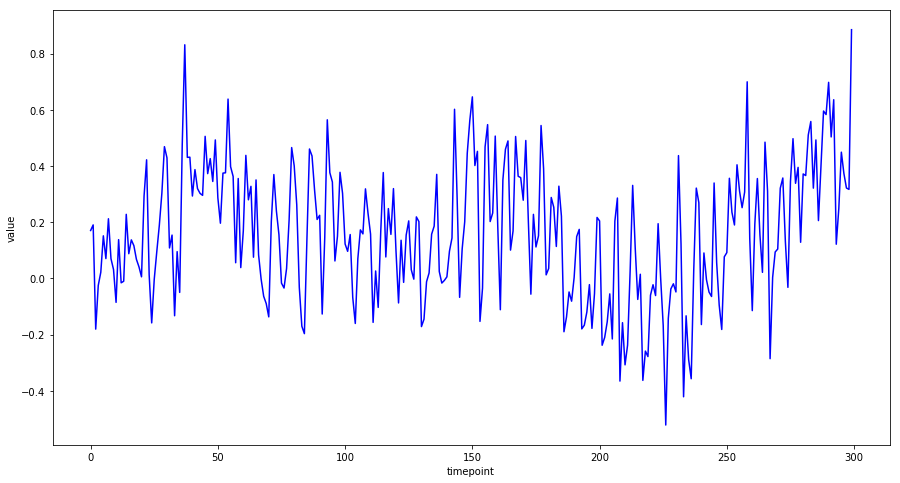

In [18]:
plt.figure(figsize=(15,8))
plt.plot(data[0], color='blue')

plt.xlabel('timepoint')
plt.ylabel('value')

plt.show()

##### 2.2.2 Apply models

In [19]:
# Naive model
for h in [1, 5, 10, 20]:
    model = NaiveModel()
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('Naive model performance ND/NRMSE (h = {}): {}/{}'.format(h,round(np.array(scores_nd).mean(),3),\
                                                           round(np.array(scores_nrmse).mean(),3)))

Naive model performance ND/NRMSE: 0.82/0.956
Naive model performance ND/NRMSE: 1.072/1.292
Naive model performance ND/NRMSE: 0.893/1.119
Naive model performance ND/NRMSE: 1.051/1.303


In [20]:
# Mean model
for h in [1, 5, 10, 20]:
    model = MeanModel()
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('Mean model performance ND/NRMSE (h = {}): {}/{}'.format(h,round(np.array(scores_nd).mean(),3),\
                                                          round(np.array(scores_nrmse).mean(),3)))

Mean model performance ND/NRMSE: 1.0/1.176
Mean model performance ND/NRMSE: 1.0/1.219
Mean model performance ND/NRMSE: 1.0/1.236
Mean model performance ND/NRMSE: 1.0/1.259


In [21]:
# AR model
for h in [1, 5, 10, 20]:
    model = AutoRegressionModel(lags)
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('AR performance ND/NRMSE (h = {}): {}/{}'.format(h,round(np.array(scores_nd).mean(),3),\
                                                  round(np.array(scores_nrmse).mean(),3)))

AR performance ND/NRMSE: 0.503/0.581
AR performance ND/NRMSE: 0.496/0.599
AR performance ND/NRMSE: 0.572/0.717
AR performance ND/NRMSE: 0.86/1.107


In [22]:
# TRMF model
lambda_f = 1.
lambda_x = 1.
lambda_w = 1.
eta = 1.
alpha = 1000.
max_iter = 5000

for h in [1, 5, 10, 20]:
    model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta, max_iter)
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('TRMF performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                    round(np.array(scores_nrmse).mean(),3)))

TRMF performance ND/NRMSE: 0.515/0.612
TRMF performance ND/NRMSE: 0.498/0.603
TRMF performance ND/NRMSE: 0.565/0.704
TRMF performance ND/NRMSE: 0.87/1.117


#### 2.3 Lags = {1,7,14,28}

##### 2.3.1 Generate several timeseries.

In [26]:
N = 16
T = 300
K = 4
lags = [1,7,14,24]
L = len(lags)
sigma_w = 0.1
sigma_x = 0.1
sigma_t = 0.0

sd = SyntheticData(N, T, K, lags, sigma_w, sigma_x, sigma_t)

In [27]:
sd.synthesize_data()
data = sd.get_data()

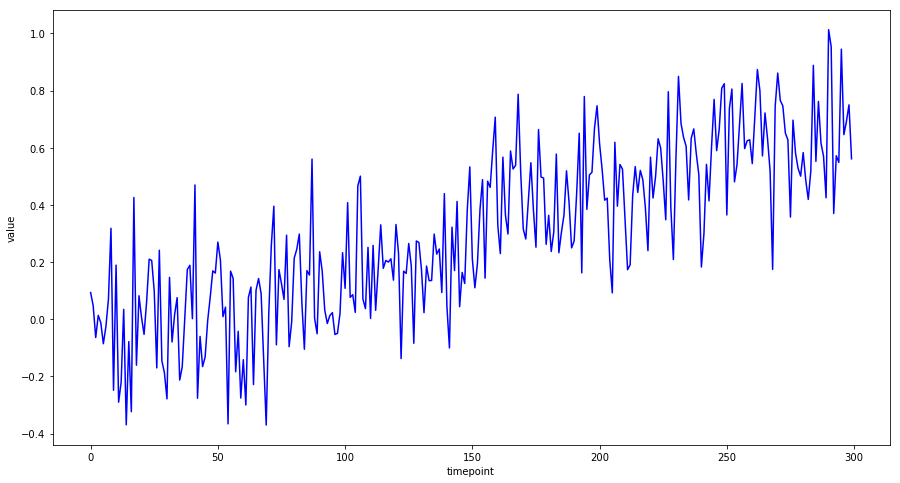

In [28]:
plt.figure(figsize=(15,8))
plt.plot(data[0], color='blue')

plt.xlabel('timepoint')
plt.ylabel('value')

plt.show()

##### 2.3.2 Apply models

In [29]:
# Naive model
for h in [1, 5, 10, 20]:
    model = NaiveModel()
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('Naive model performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                           round(np.array(scores_nrmse).mean(),3)))

Naive model performance ND/NRMSE: 1.012/1.191
Naive model performance ND/NRMSE: 0.97/1.18
Naive model performance ND/NRMSE: 0.968/1.202
Naive model performance ND/NRMSE: 0.917/1.162


In [30]:
# Mean model
for h in [1, 5, 10, 20]:
    model = MeanModel()
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('Mean model performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                          round(np.array(scores_nrmse).mean(),3)))

Mean model performance ND/NRMSE: 1.0/1.164
Mean model performance ND/NRMSE: 1.0/1.218
Mean model performance ND/NRMSE: 1.0/1.206
Mean model performance ND/NRMSE: 1.0/1.197


In [31]:
# AR model
for h in [1, 5, 10, 20]:
    model = AutoRegressionModel(lags)
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('AR performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                  round(np.array(scores_nrmse).mean(),3)))

AR performance ND/NRMSE: 0.618/0.733
AR performance ND/NRMSE: 0.506/0.648
AR performance ND/NRMSE: 0.567/0.715
AR performance ND/NRMSE: 0.619/0.755


In [32]:
# TRMF model
lambda_f = 1.
lambda_x = 1.
lambda_w = 1.
eta = 1.
alpha = 1000.
max_iter = 5000

for h in [1, 5, 10, 20]:
    model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta, max_iter)
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('TRMF performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                    round(np.array(scores_nrmse).mean(),3)))

TRMF performance ND/NRMSE: 0.633/0.662
TRMF performance ND/NRMSE: 0.544/0.676
TRMF performance ND/NRMSE: 0.578/0.726
TRMF performance ND/NRMSE: 0.582/0.72


### Results Synthetic Data (ND/NRMSE)

** Lags = {1} **

| | h=1 | h=5 | h=10 | h=20 ||
|------|------|------|------|
| Naive | **0.105**/**0.138** | **0.151**/**0.2** | **0.175**/**0.23** | 0.38/**0.477** |
| Mean | 1.0/1.136 | 1.0/1.114 | 1.0/1.094 | 1.0/1.079 |
| AutoRegression | 0.107/0.142 | 0.16/0.215 | 0.2/0.275 | 0.42/0.536 |
| TRMF | 0.172/0.218 | 0.155/0.227 | 0.197/0.261 | **0.368**/0.48 |

** Lags = {1,7} **

| | h=1 | h=5 | h=10 | h=20 ||
|------|------|------|------|
| Naive | 0.82/0.956 | 1.072/1.292 | 0.893/1.119 | 1.051/1.303 |
| Mean | 1.0/1.176 | 1.0/1.219 | 1.0/1.236 | 1.0/1.259 |
| AutoRegression | **0.503**/**0.581** | **0.496**/**0.599** | 0.572/0.717 | **0.86/1.107** |
| TRMF | 0.515/0.612 | 0.498/0.603 | **0.565/0.704** | 0.87/1.117 |

** Lags = {1,7,14,28} **

| | h=1 | h=5 | h=10 | h=20 ||
|------|------|------|------|
| Naive | 1.012/1.191 | 0.97/1.18 | 0.968/1.202 | 0.917/1.162 |
| Mean | 1.0/1.164 | 1.0/1.218 | 1.0/1.206 | 1.0/1.197 |
| AutoRegression | **0.618**/0.733 | **0.506**/**0.648** | **0.567**/**0.715** | 0.619/0.755 |
| TRMF | 0.633/**0.662** | 0.544/0.676 | 0.578/0.726 | **0.582**/**0.72** |